# Обработка данных по отелям и отзывам. Статистика по разным регионам.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SPb=pd.read_csv("SPBhotel_stats_clean.csv")
Sochi=pd.read_csv("Sochi_hotel_stats_clean.csv")
Crimea=pd.read_csv("Crimea_hotel_stats_clean.csv")
UBK=pd.read_csv("UBK_hotels_data_cleaned.csv")

In [3]:
SPb.head()

,title,area,rating,n_reviews,reference
0,AZIMUT Отель Санкт-Петербург 4*,"Россия, Санкт-Петербургский регион, Санкт-Пете...",3.83,200,https://tophotels.ru/hotel/al32924/reviews
1,Лиготель (Ligotel) 3*,"Россия, Санкт-Петербургский регион, Санкт-Пете...",4.80,88,https://tophotels.ru/hotel/al45581/reviews
2,Династия 3*,"Россия, Санкт-Петербургский регион, Санкт-Пете...",4.77,93,https://tophotels.ru/hotel/al29669/reviews
3,Отель Санкт-Петербург (Saint-Petersburg) 4*,"Россия, Санкт-Петербургский регион, Санкт-Пете...",3.82,107,https://tophotels.ru/hotel/al35920/reviews
4,Алфавит 3*,"Россия, Санкт-Петербургский регион, Санкт-Пете...",4.47,61,https://tophotels.ru/hotel/al116799/reviews


In [4]:
UBK.area.value_counts()

Россия, Крым, Алушта                                  97
Россия, Крым, Ялта                                    45
Россия, Крым, Ялта, Ялта-центр                        37
Россия, Крым, Алупка                                  29
Россия, Крым, Алушта, Профессорский Рабочий уголок    27
Россия, Крым, Алушта, Утес                            22
Россия, Крым, Алушта, Алушта-центр                    12
Россия, Крым, Алушта, Малореченское                   12
Россия, Крым, Ялта, Ливадия                           11
Россия, Крым, Ялта, Отрадное                           7
Россия, Крым, Алушта, Солнечногорское                  6
Россия, Крым, Алушта, Семидворье                       5
Россия, Крым, Ялта, Понизовка                          3
Россия, Крым, Ялта, Никита                             2
Россия, Крым, Алушта, Партенит                         1
Россия, Крым, Ялта, Парковое                           1
Россия, Крым, Алушта, Сатера                           1
Россия, Крым, Ялта, Ореанда    

In [5]:
def simple_stats(titles, data_list):
    stats=pd.DataFrame(index=titles, columns=["N_hotels","N_reviews", "area_counts","average_rating"])
    data=pd.Series(data=data_list,index=titles)
    stats["N_hotels"]=data.apply(lambda x: len(x))
    stats["N_reviews"]=data.apply(lambda x: x.n_reviews.sum())
    stats["area_counts"]=data.apply(lambda x: x.area.nunique())
    stats["average_rating"]=data.apply(lambda x: x.rating.mean())
    return stats
#stats["N_hotels"]=[len(SPb), len(Sochi), len(Crimea), len(UBK)]
#stats["N_reviews"]=[SPb.n_reviews.sum(), Sochi.n_reviews.sum(), Crimea.n_reviews.sum(), UBK.n_reviews.sum()]
#stats["area_counts"]=[SPb.area.nunique(),Sochi.area.nunique(),Crimea.area.nunique(),UBK.area.nunique()]
#stats["average_rating"]=[SPb.rating.mean(),Sochi.rating.mean(),Crimea.rating.mean(),UBK.rating.mean()]
#stats

In [6]:
titles=["SPb", "Sochi", "Crimea", "UBK"]
data_list=[SPb, Sochi, Crimea, UBK]

# Сначала - статистика по отелям

### (не по отзывам!)

## Общая статистика

In [7]:
stats=simple_stats(titles, data_list)
stats

,N_hotels,N_reviews,area_counts,average_rating
SPb,893,6289,2,3.510739
Sochi,180,3389,5,3.457167
Crimea,1239,14650,102,3.420387
UBK,322,4252,21,3.408540


## Исключим отели с нулевым (непроставленным) рейтингом...
### (Дело в том, что политика сайта предполагает, что для приобретения рейтинга на отель должно появиться не менее некоторого количества отзывов (кажется, трех). Поэтому в выборке есть отели, на которые есть отзывы, но у которых нет рейтинга)

In [8]:
def zero_nonzero(df):
    return df.loc[df.rating==0,:],df.loc[df.rating!=0,:]

SPb_zero, SPb_nonzero=zero_nonzero(SPb)
Sochi_zero, Sochi_nonzero=zero_nonzero(Sochi)
Crimea_zero, Crimea_nonzero=zero_nonzero(Crimea)
UBK_zero, UBK_nonzero=zero_nonzero(UBK)

In [9]:
nonzero_list=[SPb_nonzero, Sochi_nonzero, Crimea_nonzero, UBK_nonzero]

## Для отелей с ненулевым рейтингом

In [10]:
stats=simple_stats(titles, nonzero_list)
stats

,N_hotels,N_reviews,area_counts,average_rating
SPb,745,6081,2,4.208174
Sochi,155,3357,4,4.014774
Crimea,1051,14387,98,4.032217
UBK,275,4191,21,3.991091


## Уже интересно...

### Можно сделать первый вывод:
### - на севере гостиницы в среднем получше, чем на юге, а люди пишут поменьше

In [11]:
def compare_stats(col_name='rating', titles=titles, data_list=data_list,nbins=20):
    fig, ax=plt.subplots(figsize=(16,12),nrows=2, ncols=2)
    plt.subplots_adjust(hspace = 0.5)
    sns.set(font_scale=1.5)
    for i in range(1,len(titles)+1):
        plt.subplot(2,2,i)
        plt.title(titles[i-1])
        sns.distplot(data_list[i-1][col_name], bins=nbins, kde=False, norm_hist=False)

## Распределение рейтингов отелей в разных регионах

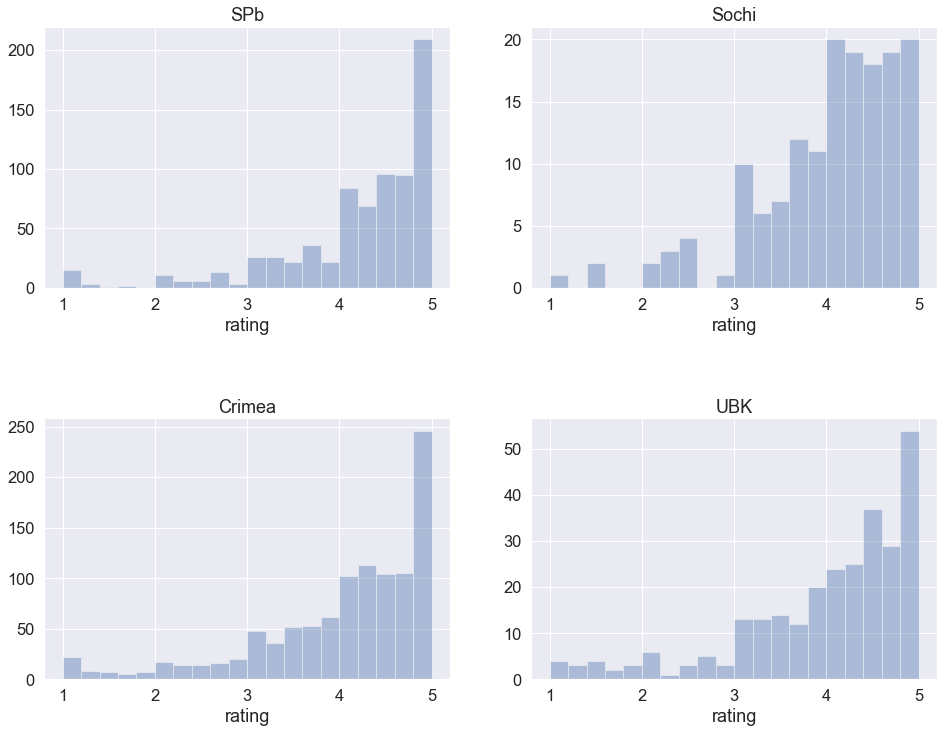

In [12]:
compare_stats(col_name='rating', titles=titles, data_list=nonzero_list)

### Распределение в Сочи немного отличается. Возможно, из-за того, что выборка меньше

## Распределение количества отзывов, даваемых на один отель

In [13]:
reviews=pd.DataFrame(columns=["SPb", "Sochi", "Crimea", "UBK"])
reviews["SPb"]=SPb["n_reviews"]
reviews["Sochi"]=Sochi["n_reviews"]
reviews["Crimea"]=Crimea["n_reviews"]
reviews["UBK"]=UBK["n_reviews"]
reviews.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,SPb,Sochi,Crimea,UBK
count,893.000000,180.000000,893.000000,322.000000
mean,7.042553,18.827778,15.702128,13.204969
std,13.274119,46.773892,43.484660,29.293470
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000
50%,2.000000,4.000000,5.000000,4.000000
75%,7.000000,18.000000,14.000000,11.750000
90%,18.000000,45.100000,32.800000,30.900000
99%,61.960000,196.190000,199.960000,165.340000
max,200.000000,458.000000,756.000000,260.000000


### на ЮБК были обрезаны два отеля с 756 и 500 с чем-то отзывов, которые присутствуют в выборке в Крыму, поэтому в Крыму последние цифры выше

### подтверждается вывод о том, что на юге среднее количество отзывов на гостиницу больше, чем на севере...

### В целом, выборка отелей "Алушта, Ялта, Алупка" (ЮБК) из всей Крымской выборки достаточно показательна, и ее корректно сравнивать с Питером и Сочи

# Распределение количества отзывов по рейтингам отелей

In [14]:
def conv_rate(x):
    if x>4.5:
        return 4.5
    if x>4.0:
        return 4.0
    if x>3.5:
        return 3.5
    if x>3.0:
        return 3.0
    if x>2.5:
        return 2.5
    if x>2.0:
        return 2.0
    if x>1.5:
        return 1.5
    if x>=1.0:
        return 1.0
    return 0
nreviews_dist=[]
for data in data_list:
    a=data.loc[:,["rating","n_reviews"]]
    a["rating"]=a.rating.apply(lambda x: conv_rate(x))
    a=a.groupby(by="rating").sum()
    nreviews_dist.append(a)

In [15]:
def compare_stats_new(titles=titles, colors=['blue','red','magenta','green'], data_list=data_list):
    fig, ax=plt.subplots(figsize=(16,12),nrows=2, ncols=2)
    plt.subplots_adjust(hspace = 0.5)
    #sns.set(font_scale=1.5)
    for i in range(1,len(titles)+1):
        axi=plt.subplot(2,2,i)
        #plt.title(titles[i-1])
        data_list[i-1].plot(kind='bar', color=colors[i-1], title=titles[i-1], ax=axi)

# Количество отзывов для каждой из оценок

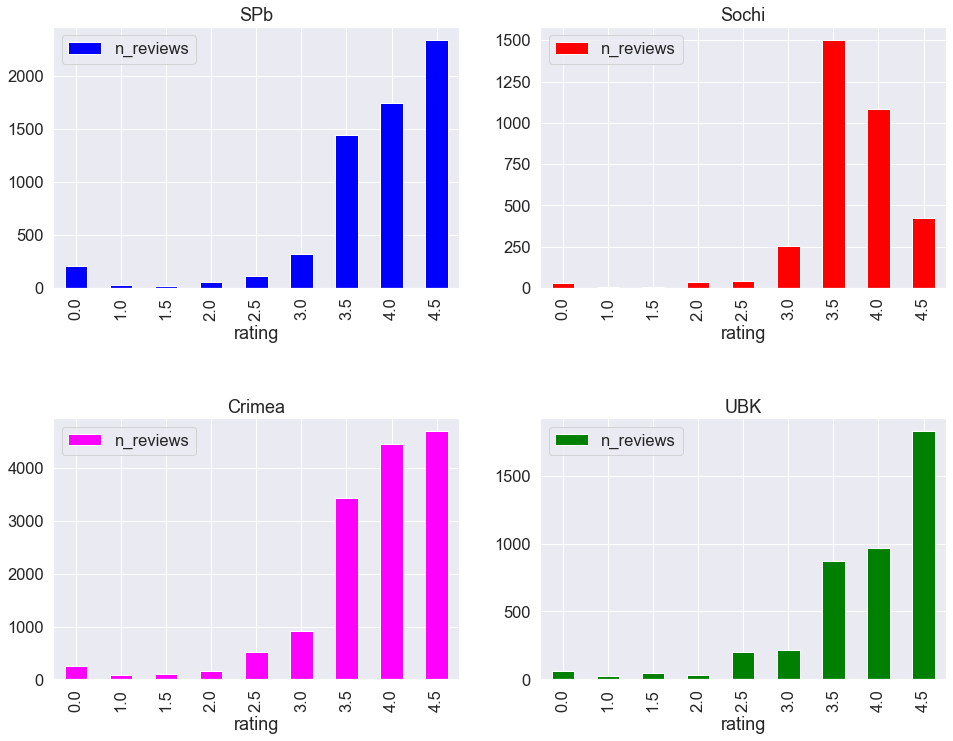

In [16]:
compare_stats_new(data_list=nreviews_dist)

## Предварительные выводы:
 
 - в Питере больше отелей с отзывами, но без рейтинга
 - в Сочи люди больше всего жалуются
 - на ЮБК (в отличие от остального Крыма) почему-то много положительных отзывов (по сравнению  остальными)

# Теперь - статистики самих отзывов (проставленные пользователями оценки) в разных городах

### (Питер, Сочи, ЮБК)

In [17]:
SPb_reviews=pd.read_csv("SPb_reviews_raw.csv")
Sochi_reviews=pd.read_csv("Sochi_reviews_raw.csv")
UBK_reviews=pd.read_csv("UBK_reviews_raw_from3.csv")

In [18]:
#titles=["SPb", "Sochi", "Crimea", "UBK"]
titles=["SPb", "Sochi", "UBK"]
data_list=[SPb_reviews, Sochi_reviews, UBK_reviews]

## Почистим статистики отзывов от отелей с нулевым (непроставленным) рейтингом

In [19]:
def clean_zero_ratings(reviews, zero_ratings):
    reviews.set_index("reference", drop=False, inplace=True) # list a, list b
    index_to_drop=list(set(zero_ratings.reference.to_list())&set(reviews.index.to_list())) # c=list(set(a) & set(b)) - intersection
    reviews.drop(index_to_drop, axis=0, inplace=True)
    reviews.reset_index(drop=True,inplace=True)

In [20]:
clean_zero_ratings(SPb_reviews, SPb_zero)

In [21]:
clean_zero_ratings(Sochi_reviews, Sochi_zero)

In [22]:
clean_zero_ratings(UBK_reviews, UBK_zero)

In [23]:
UBK_reviews.head()

,reference,user,mark,date,time_delta,text
0,https://tophotels.ru/hotel/al19743/reviews,1828746,5.0,22:26\r\n 24.07.20,Отзыв был добавлен через 14 дней после посещения,"Друзья часто спрашивают, чего вы в Крым зачаст..."
1,https://tophotels.ru/hotel/al19743/reviews,2014547,3.3,17:55\r\n 20.07.20,Отзыв добавлен из отеля,"У отеля отличная концепция, всегда мечтала не ..."
2,https://tophotels.ru/hotel/al19743/reviews,2006971,5.0,14:14\r\n 24.03.20,Отзыв добавлен из отеля,Мы в этом отеле оказались случайно. Должны был...
3,https://tophotels.ru/hotel/al19743/reviews,2006808,5.0,12:41\r\n 22.03.20,Отзыв был добавлен во время посещения,Понравилось все! Начиная от менеджера Яны с от...
4,https://tophotels.ru/hotel/al19743/reviews,2003324,5.0,11:56\r\n 03.03.20,Отзыв был добавлен во время посещения,С самого заезда нас окружали заботой все сотру...


## EDA

In [24]:
#data_list=[SPb, Sochi, UBK]
#titles=["SPb", "Sochi", "UBK"]

In [25]:
for df in data_list:
    df.dropna(axis=0,subset=['text'],inplace=True)

In [26]:
for df in data_list:
    print(df.isna().sum())

reference     0
user          0
mark          0
date          0
time_delta    0
text          0
dtype: int64
reference     0
user          0
mark          0
date          0
time_delta    0
text          0
dtype: int64
reference     0
user          0
mark          0
date          0
time_delta    0
text          0
dtype: int64


### Превратим time_delta в осмысленный признак - примерное количество дней между временем посещения объекта и написанием отзыва

In [27]:
for df in data_list:
    df["date"]=df.date.apply(lambda x: x[-8:])
    df["conv_date"]=pd.to_datetime(df.date)

In [28]:
for data in data_list:
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace("Отзыв был добавлен через ",""))
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace(" дней после посещения",""))
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace(" дня после посещения",""))
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace("Отзыв был добавлен во время посещения","0"))
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace("Отзыв добавлен из отеля","0"))
    data["time_delta"]=data["time_delta"].apply(lambda x: x.replace("1 день после посещения","1"))
    #data["time_delta"]=data["time_delta"].apply(lambda x: '32' if "месяц" in x else x)
    data["time_delta"]=data["time_delta"].apply(lambda x: '365' if "год" in x else x)
    data["time_delta"]=data["time_delta"].apply(lambda x: '365' if "лет" in x else x)

In [29]:
def fit_delta(x):
    if "месяц" in x:
        p=x.find("месяц")
        y=x[0:p]
        y.strip()
        if len(y)>0:
            z=int(y)
            z*=30
            return str(z)
    return x

In [30]:
for data in data_list:
    data["time_delta"]=data["time_delta"].apply(lambda x: fit_delta(x))
    data["time_delta"]=data["time_delta"].astype('int32')

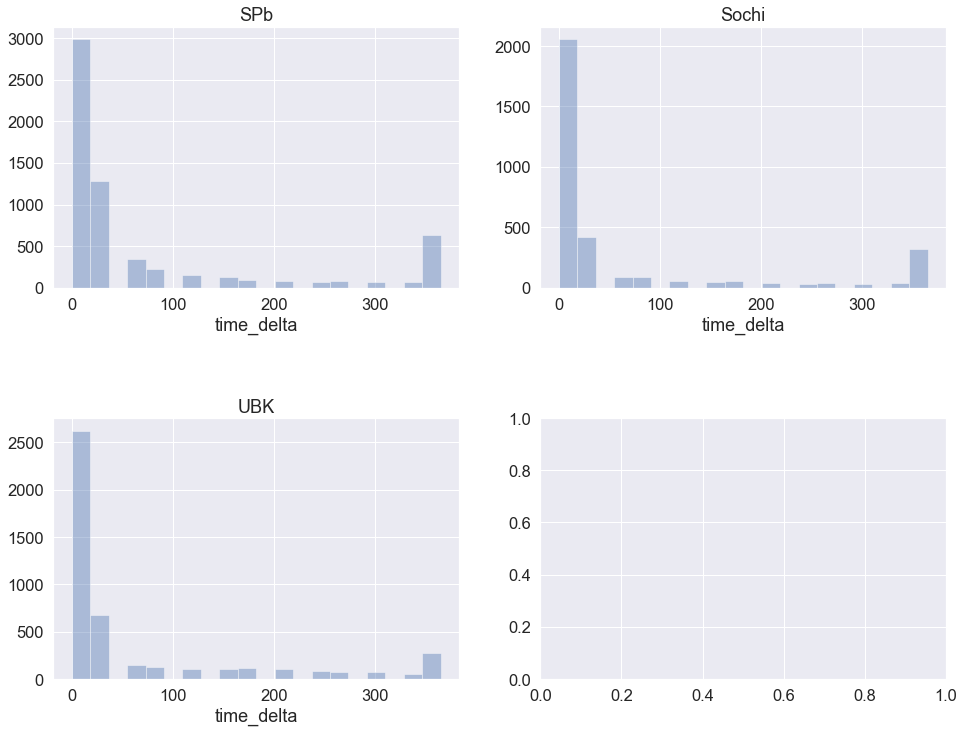

In [34]:
compare_stats(col_name='time_delta',titles=titles, data_list=data_list)

### Есть отзывы, написанные более, чем через год после посещения...

In [33]:
SPb_reviews.user=SPb_reviews.user.astype('int64')

In [34]:
SPb_reviews.mark=SPb_reviews.mark.astype('float64')

In [35]:
def simple_stats_review(titles, data_list):
    stats=pd.DataFrame(index=titles, columns=["N_hotels","N_reviews", "user_counts","average_tdelta","average_rating"])
    data=pd.Series(data=data_list,index=titles)
    stats["N_hotels"]=data.apply(lambda x: x.reference.nunique())
    stats["N_reviews"]=data.apply(lambda x: len(x))
    stats["user_counts"]=data.apply(lambda x: x.user.nunique())
    stats["average_tdelta"]=data.apply(lambda x: x.time_delta.mean())
    stats["average_rating"]=data.apply(lambda x: x.mark.mean())
    return stats

In [36]:
simple_stats_review(titles, data_list)

,N_hotels,N_reviews,user_counts,average_tdelta,average_rating
SPb,745,6199,4238,76.009034,4.285611
Sochi,155,3311,2907,66.561764,4.080097
UBK,146,4574,3384,66.712943,4.317753


### Если по Сочи и по Питеру картина рейтингов изменилась не сильно, то ЮБК вырвался вперед с примерно 4 до 4.3

## Это согласуется с тем фактом, что на ЮБК у отелей с высоким рейтингом число отзывов в распределении больше, чем в других регионах

### ...дописывают больше положительных отзывов?

In [37]:
len(data_list[0])

6199

In [38]:
for data in data_list:
    print(len(data.loc[data.text.apply(lambda x: len(x)==0),:]))

0
0
0


### (отзывы нулевой длины отсутствуют)

## Удалим возможные дубликаты в отзывах

In [39]:
duplicates=[]
for data in data_list:
    duplicates.append(data.loc[data.duplicated("text", keep=False),:])
    print(len(duplicates[-1]))

45
8
1361


### (выведено удвоенное количество дубликатов; на ЮБК - особенно много)

In [40]:
duplicates[0].head(10)

,reference,user,mark,date,time_delta,text,conv_date
210,https://tophotels.ru/hotel/al45581/reviews,1931561,4.5,10.09.19,90,Выбрала этот отель из-за расположения около Мо...,2019-10-09
211,https://tophotels.ru/hotel/al45581/reviews,1931561,4.8,09.09.19,90,Выбрала этот отель из-за расположения около Мо...,2019-09-09
213,https://tophotels.ru/hotel/al45581/reviews,1886062,5.0,15.07.19,30,Был в командировке в Санкт-Петербурге. Мне нуж...,2019-07-15
214,https://tophotels.ru/hotel/al45581/reviews,1886062,5.0,13.07.19,30,Был в командировке в Санкт-Петербурге. Мне нуж...,2019-07-13
226,https://tophotels.ru/hotel/al45581/reviews,1755223,5.0,28.10.18,28,"Мне отель очень понравился, соотношение цена и...",2018-10-28
227,https://tophotels.ru/hotel/al45581/reviews,1755223,5.0,27.10.18,27,"Мне отель очень понравился, соотношение цена и...",2018-10-27
238,https://tophotels.ru/hotel/al45581/reviews,1452877,4.5,12.05.18,12,"Приезжали на выходные в Питер, останавливались...",2018-12-05
239,https://tophotels.ru/hotel/al45581/reviews,1452877,5.0,11.05.18,11,"Приезжали на выходные в Питер, останавливались...",2018-11-05
281,https://tophotels.ru/hotel/al45581/reviews,1004785,5.0,04.07.15,120,"Отель находится в центре города, что для меня ...",2015-04-07
282,https://tophotels.ru/hotel/al45581/reviews,1004785,5.0,02.07.15,150,"Отель находится в центре города, что для меня ...",2015-02-07


### Некоторые из задвоенных отзывов имеют даже разную дату и разную оценку, что интересно...

In [41]:
for data in data_list:
    data.drop_duplicates("text", inplace=True)

## Пересмотрим статистику:

In [42]:
simple_stats_review(titles, data_list)

,N_hotels,N_reviews,user_counts,average_tdelta,average_rating
SPb,745,6175,4235,76.052632,4.285231
Sochi,155,3307,2907,66.439069,4.079891
UBK,146,3887,3378,66.390275,4.283869


### Сильно не поменялась...

In [43]:
hotel_data_list=[SPb, Sochi, UBK]





**Сильно ли отличается характер распределения оценок отзывов для 
отелей с оценкой > 4.8 в С.-Пб., Крыму, и Сочи? Для отелей с 50+ отзывов 
и для отелей с количеством отзывов <50?**





In [74]:
# Отели с оценкой > 4.5 и количеством отзывов >50
ratings50plus=[]
ratings50minus=[]
for i in range(0, len(data_list)):
#i=0
    hd=hotel_data_list[i].loc[hotel_data_list[i].rating>=4.5,:]
    d=data_list[i]
    goodMarkIndex=hd.set_index("reference", drop=True)
    goodMarkIndex=goodMarkIndex.index
    ind_50plus=d.reference.value_counts().loc[d.reference.value_counts()>=50].index
    ind_50minus=d.reference.value_counts().loc[d.reference.value_counts()<50].index
    ind_50plus=list(set(ind_50plus.tolist())&set(goodMarkIndex.to_list()))
    ind_50minus=list(set(ind_50minus.tolist())&set(goodMarkIndex.to_list()))
    
    ratings50plus.append(d.loc[d.reference.apply(lambda x: x in ind_50plus),:])
    ratings50minus.append(d.loc[d.reference.apply(lambda x: x in ind_50minus),:])

In [58]:
d=data_list[i]
ind_50plus=hd.loc[hd.n_reviews>50,:].set_index("reference", drop=True).index
ind_50minus=hd.loc[hd.n_reviews<=50,:].set_index("reference", drop=True).index

In [75]:
for i in range(0,len(titles)):
    print(titles[i],', ratings for N_reviews>50: ',len(ratings50plus[i]),', ratings for N_reviews<=50: ',len(ratings50minus[i]), '\n')

SPb , ratings for N_reviews>50:  358 , ratings for N_reviews<=50:  2194 

Sochi , ratings for N_reviews>50:  57 , ratings for N_reviews<=50:  376 

UBK , ratings for N_reviews>50:  1088 , ratings for N_reviews<=50:  732 



(array([ 12.,   3.,   5.,   4.,   4.,  18.,  22.,  28.,  68., 568.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

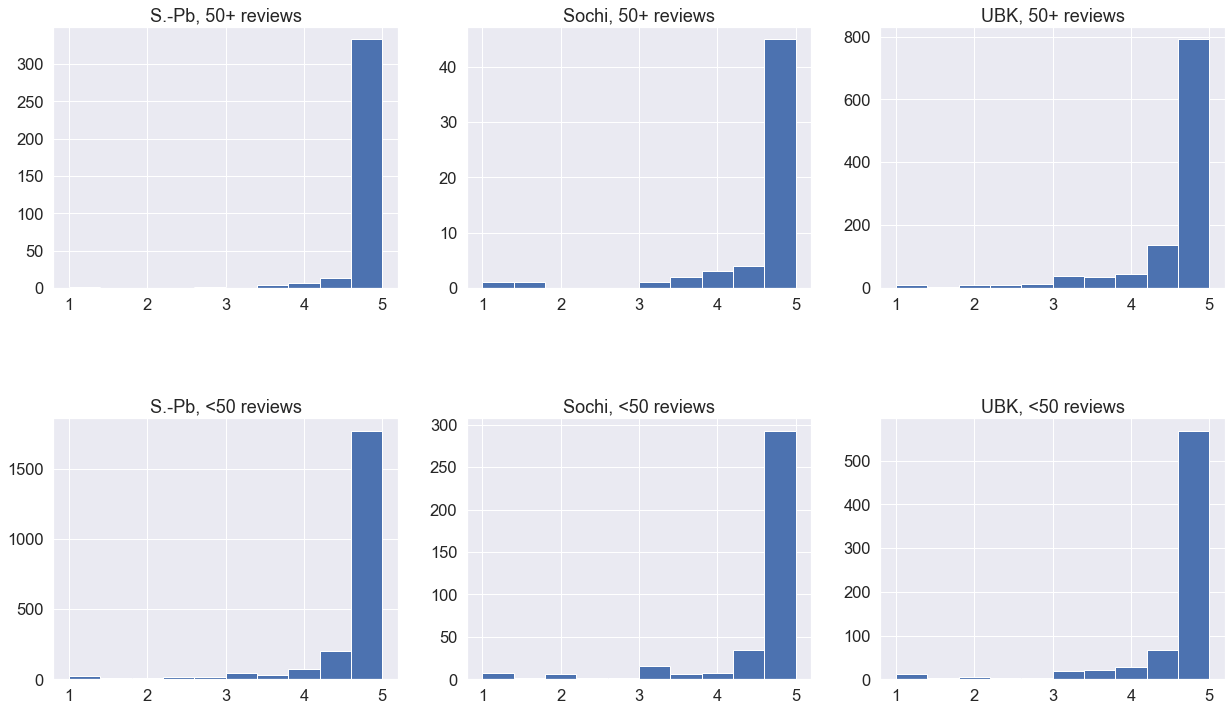

In [89]:
fig, ax=plt.subplots(figsize=(21,12), nrows=2, ncols=3)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2,3,1)
plt.title("S.-Pb, 50+ reviews")
plt.hist(ratings50plus[0].mark)
plt.subplot(2,3,2)
plt.title("Sochi, 50+ reviews")
plt.hist(ratings50plus[1].mark)
plt.subplot(2,3,3)
plt.title("UBK, 50+ reviews")
plt.hist(ratings50plus[2].mark)
plt.subplot(2,3,4)
plt.title("S.-Pb, <50 reviews")
plt.hist(ratings50minus[0].mark)
plt.subplot(2,3,5)
plt.title("Sochi, <50 reviews")
plt.hist(ratings50minus[1].mark)
plt.subplot(2,3,6)
plt.title("UBK, <50 reviews")
plt.hist(ratings50minus[2].mark)

## Логарифмированные распределения

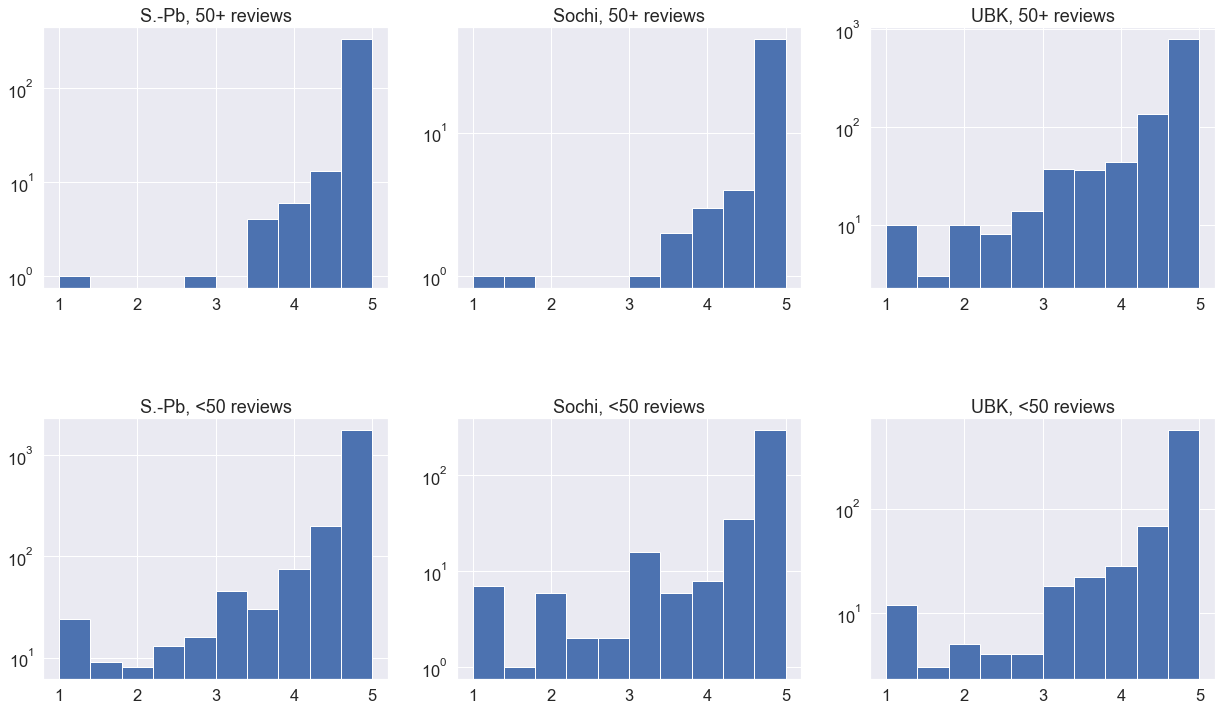

In [91]:
fig, ax=plt.subplots(figsize=(21,12), nrows=2, ncols=3)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2,3,1)
plt.title("S.-Pb, 50+ reviews")
plt.hist(ratings50plus[0].mark, log=True)
plt.subplot(2,3,2)
plt.title("Sochi, 50+ reviews")
plt.hist(ratings50plus[1].mark, log=True)
plt.subplot(2,3,3)
plt.title("UBK, 50+ reviews")
plt.hist(ratings50plus[2].mark, log=True)
plt.subplot(2,3,4)
plt.title("S.-Pb, <50 reviews")
plt.hist(ratings50minus[0].mark, log=True)
plt.subplot(2,3,5)
plt.title("Sochi, <50 reviews")
plt.hist(ratings50minus[1].mark, log=True)
plt.subplot(2,3,6)
plt.title("UBK, <50 reviews")
plt.hist(ratings50minus[2].mark, log=True);

### Еще раз, статистика по городам:

In [92]:
for i in range(0,len(titles)):
    print(titles[i],', ratings for N_reviews>50: ',len(ratings50plus[i]),', ratings for N_reviews<=50: ',len(ratings50minus[i]), '\n')

SPb , ratings for N_reviews>50:  358 , ratings for N_reviews<=50:  2194 

Sochi , ratings for N_reviews>50:  57 , ratings for N_reviews<=50:  376 

UBK , ratings for N_reviews>50:  1088 , ratings for N_reviews<=50:  732 



# Вывод...?

# Как правильно преобразовать оценки, чтоб свести регрессию к классификации

In [44]:
newlist=[data.loc[data["mark"]>2.0,:] for data in data_list]

## Распределения оценок (теперь уже по отзывам)

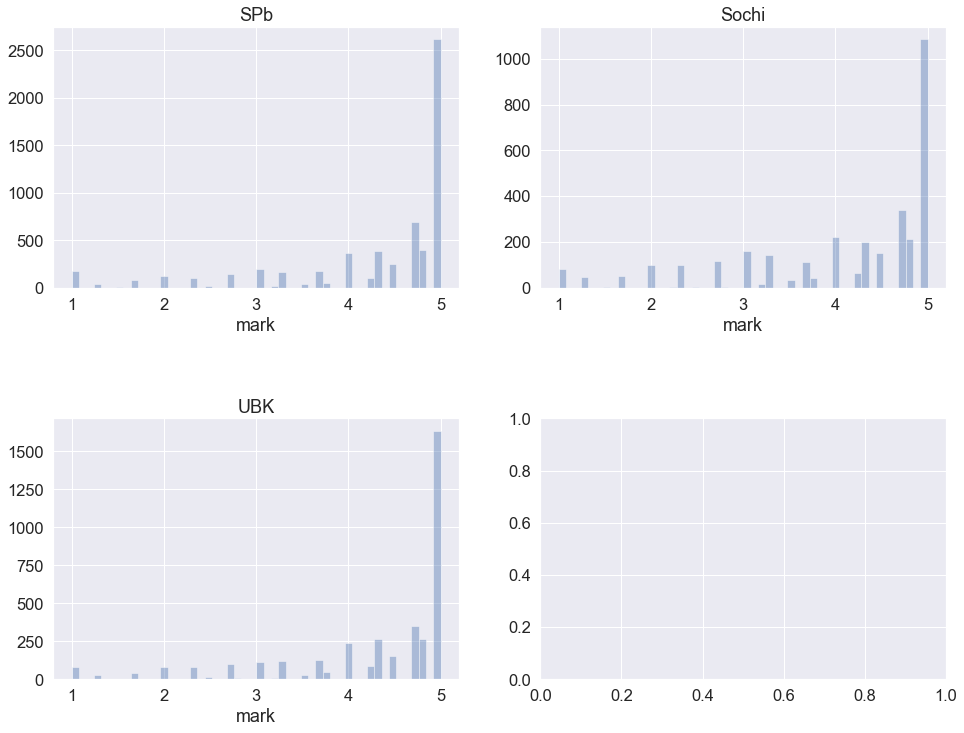

In [45]:
compare_stats(col_name='mark', titles=titles, data_list=data_list, nbins=50)

### Распределения похожие. Посмотрев на них пристально (чуть более детально) введем следующую систему классификации оценок

In [46]:
data_list[2].describe(percentiles=[0.33,0.66,0.99])

,user,mark,time_delta
count,3.887000e+03,3887.000000,3887.000000
mean,1.059401e+06,4.283869,66.390275
std,6.066467e+05,1.000710,109.686501
min,0.000000e+00,1.000000,0.000000
33%,8.161394e+05,4.300000,4.000000
50%,1.179244e+06,4.700000,11.000000
66%,1.367175e+06,5.000000,30.000000
99%,2.008361e+06,5.000000,365.000000
max,2.015429e+06,5.000000,365.000000


In [47]:
# Политика ранжирования оценок:
# 5 - >4.9
# 4 - 3.5<x<=4.8
# 3 - x<=3.5


In [48]:
def fit_ranges(x):
    if x>4.9:
        return 5
    if x>3.5:
        return 4
    #if x>=3:
        #return 3
    return 3

In [49]:
newdata=[]
for data in data_list:
    d=data.copy(deep=True)
    d["mark"]=data.mark.apply(lambda x: fit_ranges(x))
    newdata.append(d)

### После перехода к классификации:

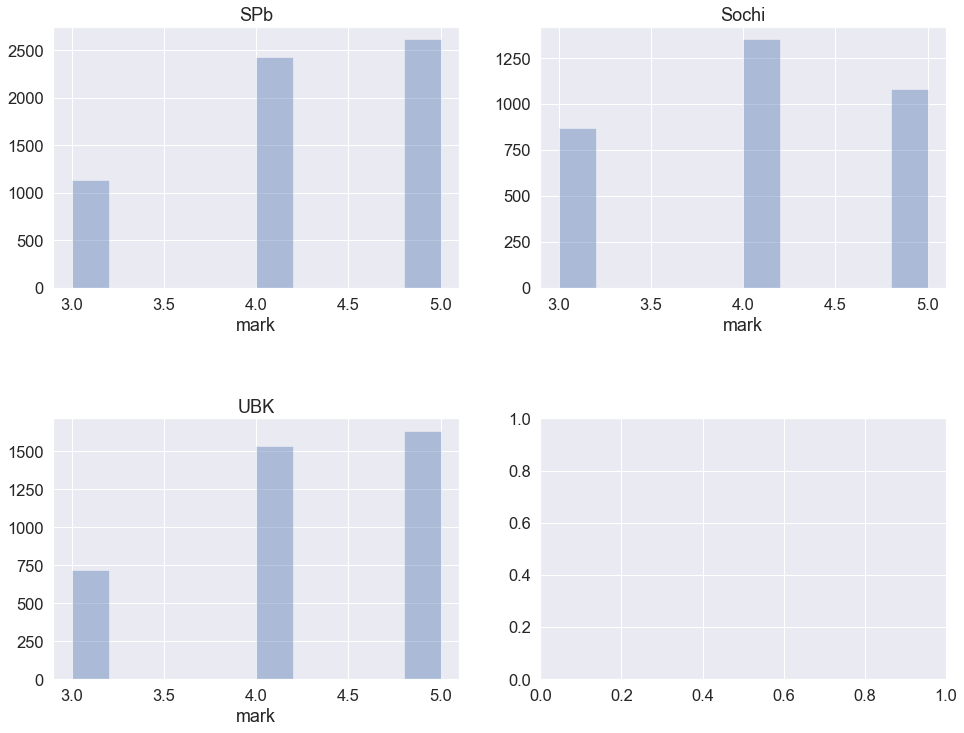

In [50]:
compare_stats(col_name='mark', titles=titles, data_list=newdata, nbins=10)

In [51]:
for data in newdata:
    data.drop("date", axis=1, inplace=True)

In [52]:
for i in range(0, len(newdata)):
    data=newdata[i]
    title=titles[i]
    fname=title+"reviews_cleaned.csv"
    data.to_csv(fname,header=data.columns,index=False)